In [4]:
import pandas as pd 
import numpy as np 

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
import os
print(os.getcwd())

c:\Users\BEST LAPTOP\Desktop\ML_Projects\NYC


In [7]:
df = pd.read_csv('NYC_2019.csv')

In [8]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
# Shape of Dataset 
rows , cols = df.shape
print(f"Rows-> {rows}  Cols => {cols}")

Rows-> 48895  Cols => 16


In [10]:
# Null Values of Dataset
df.isnull().sum().sort_values(ascending = False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
# Duplicates in Dataset 
df.duplicated().sum()

np.int64(0)

In [12]:
# Overview of Dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [13]:
# Mathematical Overview
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [14]:
df.corr(numeric_only=True)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


In [15]:
# Drop columns that having weak or less important 
df = df.drop(['id' , 'name' , 'host_id' ,'last_review'] , axis = 1 )

In [16]:
df = df.drop('host_name' , axis = 1)

In [17]:
columns = df.columns 
for col in columns:
    print(col)
    print(df[col].unique())


neighbourhood_group
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
neighbourhood
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason Point' 'Eastchester' 'Kingsbridge'
 'Two Bridges' 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


In [19]:
df.sample(4)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
39653,Manhattan,Financial District,40.70612,-74.01585,Private room,80,3,0,NaN,1,133
43445,Manhattan,Theater District,40.75938,-73.98749,Entire home/apt,219,30,0,NaN,232,14
45155,Manhattan,Upper West Side,40.80032,-73.95998,Entire home/apt,285,1,9,5.09,1,229
15841,Brooklyn,Bedford-Stuyvesant,40.68552,-73.92270,Private room,60,1,104,2.68,3,293


In [20]:
categorical_columns = ['room_type' ,'neighbourhood_group','neighbourhood']

In [21]:
from sklearn.preprocessing import LabelEncoder

lableencoder = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    lableencoder[col] = le

In [22]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2,127,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,2,94,40.80902,-73.94190,1,150,3,0,NaN,1,365
3,1,41,40.68514,-73.95976,0,89,1,270,4.64,1,194
4,2,61,40.79851,-73.94399,0,80,10,9,0.10,1,0


# Impute Missing Values using iterative algorithum 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [24]:
# Convert dataset into nonNull and Null datasets
df_without_missing = df.dropna()
df_with_missing = df[df['reviews_per_month'].isna()]

In [25]:
print(df_without_missing.shape)
print(df_with_missing.shape)


(38843, 11)
(10052, 11)


In [26]:
# Prepare dataset for Training
X = df_without_missing.drop('reviews_per_month' , axis = 1)
y = df_without_missing['reviews_per_month']
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2 , random_state = 42) 

In [27]:
rf = RandomForestRegressor(n_estimators = 20 , random_state = 42)

In [28]:
# Train Model
rf.fit(X_train , y_train)

,n_estimators,20
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
# Predict values
y_pred = rf.predict(X_test)

## Let's Evaluate the model


In [30]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error, root_mean_squared_error
print(f"Mean Absolute Error -> {mean_absolute_error(y_pred , y_test)}")
print(f"Mean Absolute Percentage Error -> {mean_absolute_percentage_error(y_pred , y_test)}")
print(f"Root Mean Squared Error -> {root_mean_squared_error(y_pred , y_test)}")
print(f"R2 Score -> {r2_score(y_pred , y_test)}")

Mean Absolute Error -> 0.7210436993178015
Mean Absolute Percentage Error -> 0.6613546425046697
Root Mean Squared Error -> 1.1525611813299605
R2 Score -> 0.22984850573770488


In [31]:
# Predict Missing Vallues
df_with_missing['new_values'] = rf.predict(df_with_missing.drop('reviews_per_month' , axis = 1))


C:\Users\BEST LAPTOP\AppData\Local\Temp\ipykernel_6112\1480993948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing['new_values'] = rf.predict(df_with_missing.drop('reviews_per_month' , axis = 1))


In [32]:
# Assign Values to Existing Values
df_with_missing['reviews_per_month'] = df_with_missing['new_values']

C:\Users\BEST LAPTOP\AppData\Local\Temp\ipykernel_6112\2135235414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_missing['reviews_per_month'] = df_with_missing['new_values']


In [33]:
# Drop extra column
df_with_missing = df_with_missing.drop('new_values' , axis = 1 )

In [34]:
# concatenate the two dataframes
df_complete = pd.concat([df_with_missing, df_without_missing], axis=0)
# print the shape of the complete dataframe
print("The shape of the complete dataframe is: ", df_complete.shape)

The shape of the complete dataframe is:  (48895, 11)


In [35]:
# Verify Null values 
df_complete.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [36]:
for col in categorical_columns:
    # Retrieve the corresponding LabelEncoder for the column
    le = lableencoder[col]

    # Inverse transform the data
    df_complete[col] = le.inverse_transform(df[col])
    
# check the first 5 rows of the complete dataframe
df_complete.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2,Brooklyn,Kensington,40.80902,-73.94190,Private room,150,3,0,0.4915,1,365
19,Manhattan,Midtown,40.79685,-73.94872,Entire home/apt,190,7,0,0.7605,2,249
26,Manhattan,Harlem,40.86754,-73.92639,Private room,80,4,0,0.0360,1,0
36,Brooklyn,Clinton Hill,40.68876,-73.94312,Entire home/apt,35,60,0,0.1845,1,365
38,Manhattan,East Harlem,40.63702,-73.96327,Entire home/apt,150,1,0,0.1725,1,365


# Let's perform some EDA

<Axes: xlabel='neighbourhood_group', ylabel='price'>

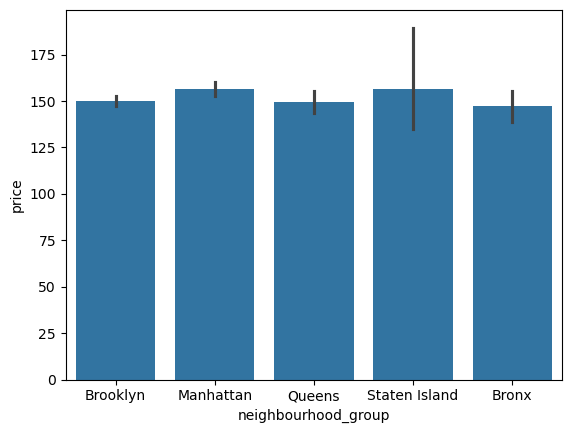

In [37]:
# neighbourhood_group x Price 
sns.barplot(data = df_complete , x = 'neighbourhood_group' , y = 'price') 

<Axes: xlabel='neighbourhood_group', ylabel='count'>

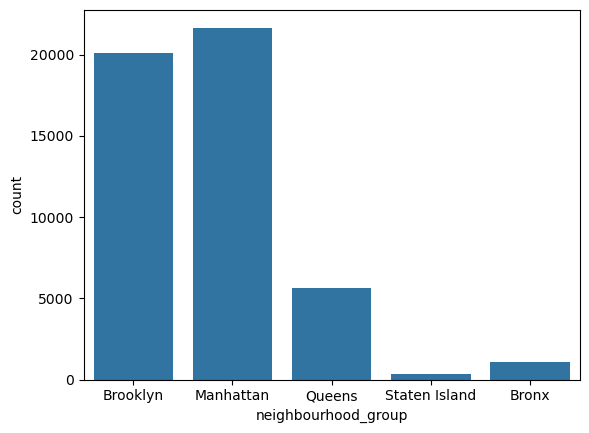

In [38]:
sns.countplot(data = df_complete , x = 'neighbourhood_group')

<Axes: xlabel='neighbourhood', ylabel='price'>

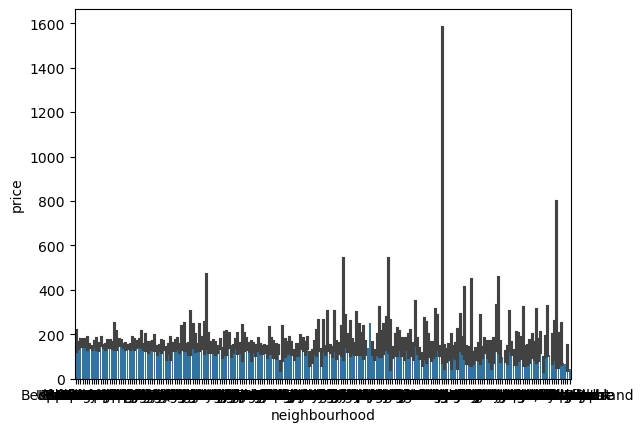

In [39]:
sns.barplot( data = df_complete , x = 'neighbourhood' , y = 'price')

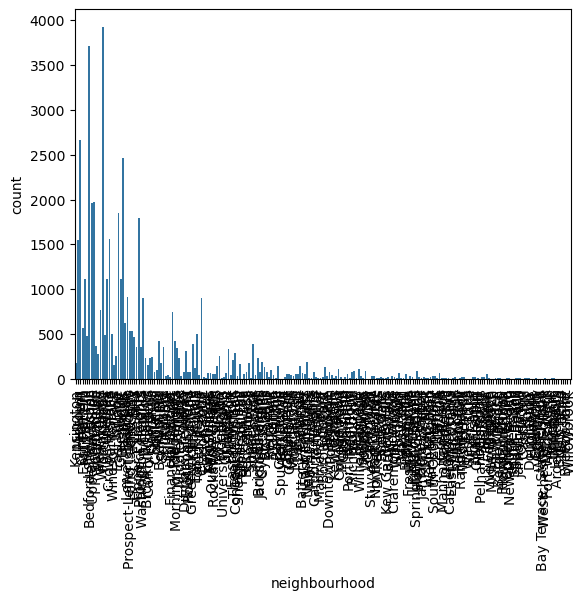

In [40]:
sns.countplot(data= df_complete , x ='neighbourhood')
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='latitude', ylabel='price'>

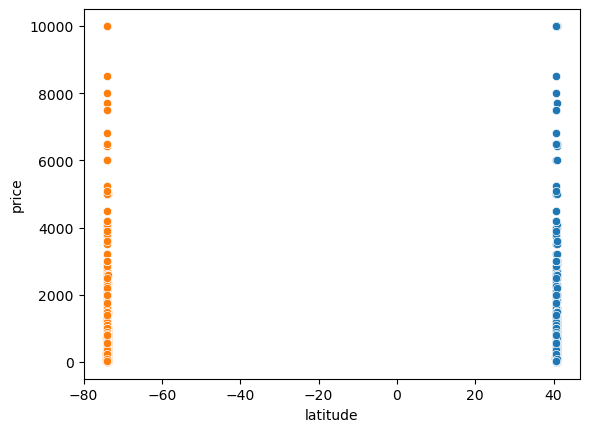

In [41]:
sns.scatterplot(data = df_complete , x = 'latitude' , y = 'price')
sns.scatterplot(data = df_complete , x = 'longitude' , y = 'price')

<Axes: xlabel='room_type', ylabel='count'>

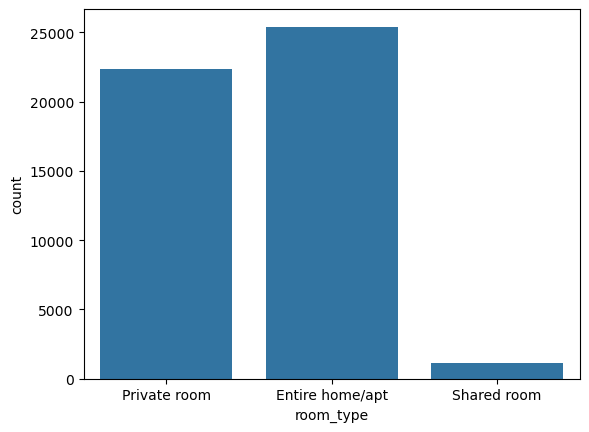

In [42]:
sns.countplot(data = df_complete , x = 'room_type')

<Axes: >

c:\Users\BEST LAPTOP\miniconda3\envs\ml_env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\BEST LAPTOP\miniconda3\envs\ml_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


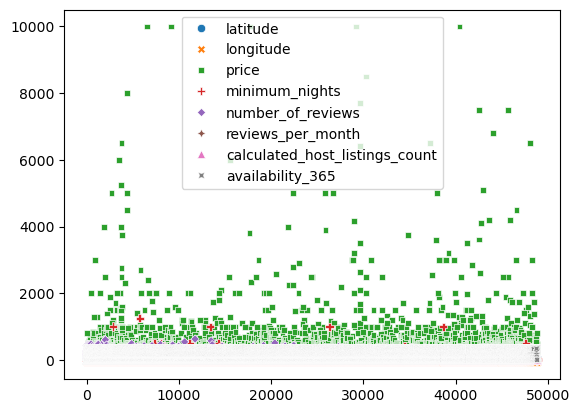

In [43]:
sns.scatterplot(data = df_complete)

In [44]:
cols = df_complete.columns

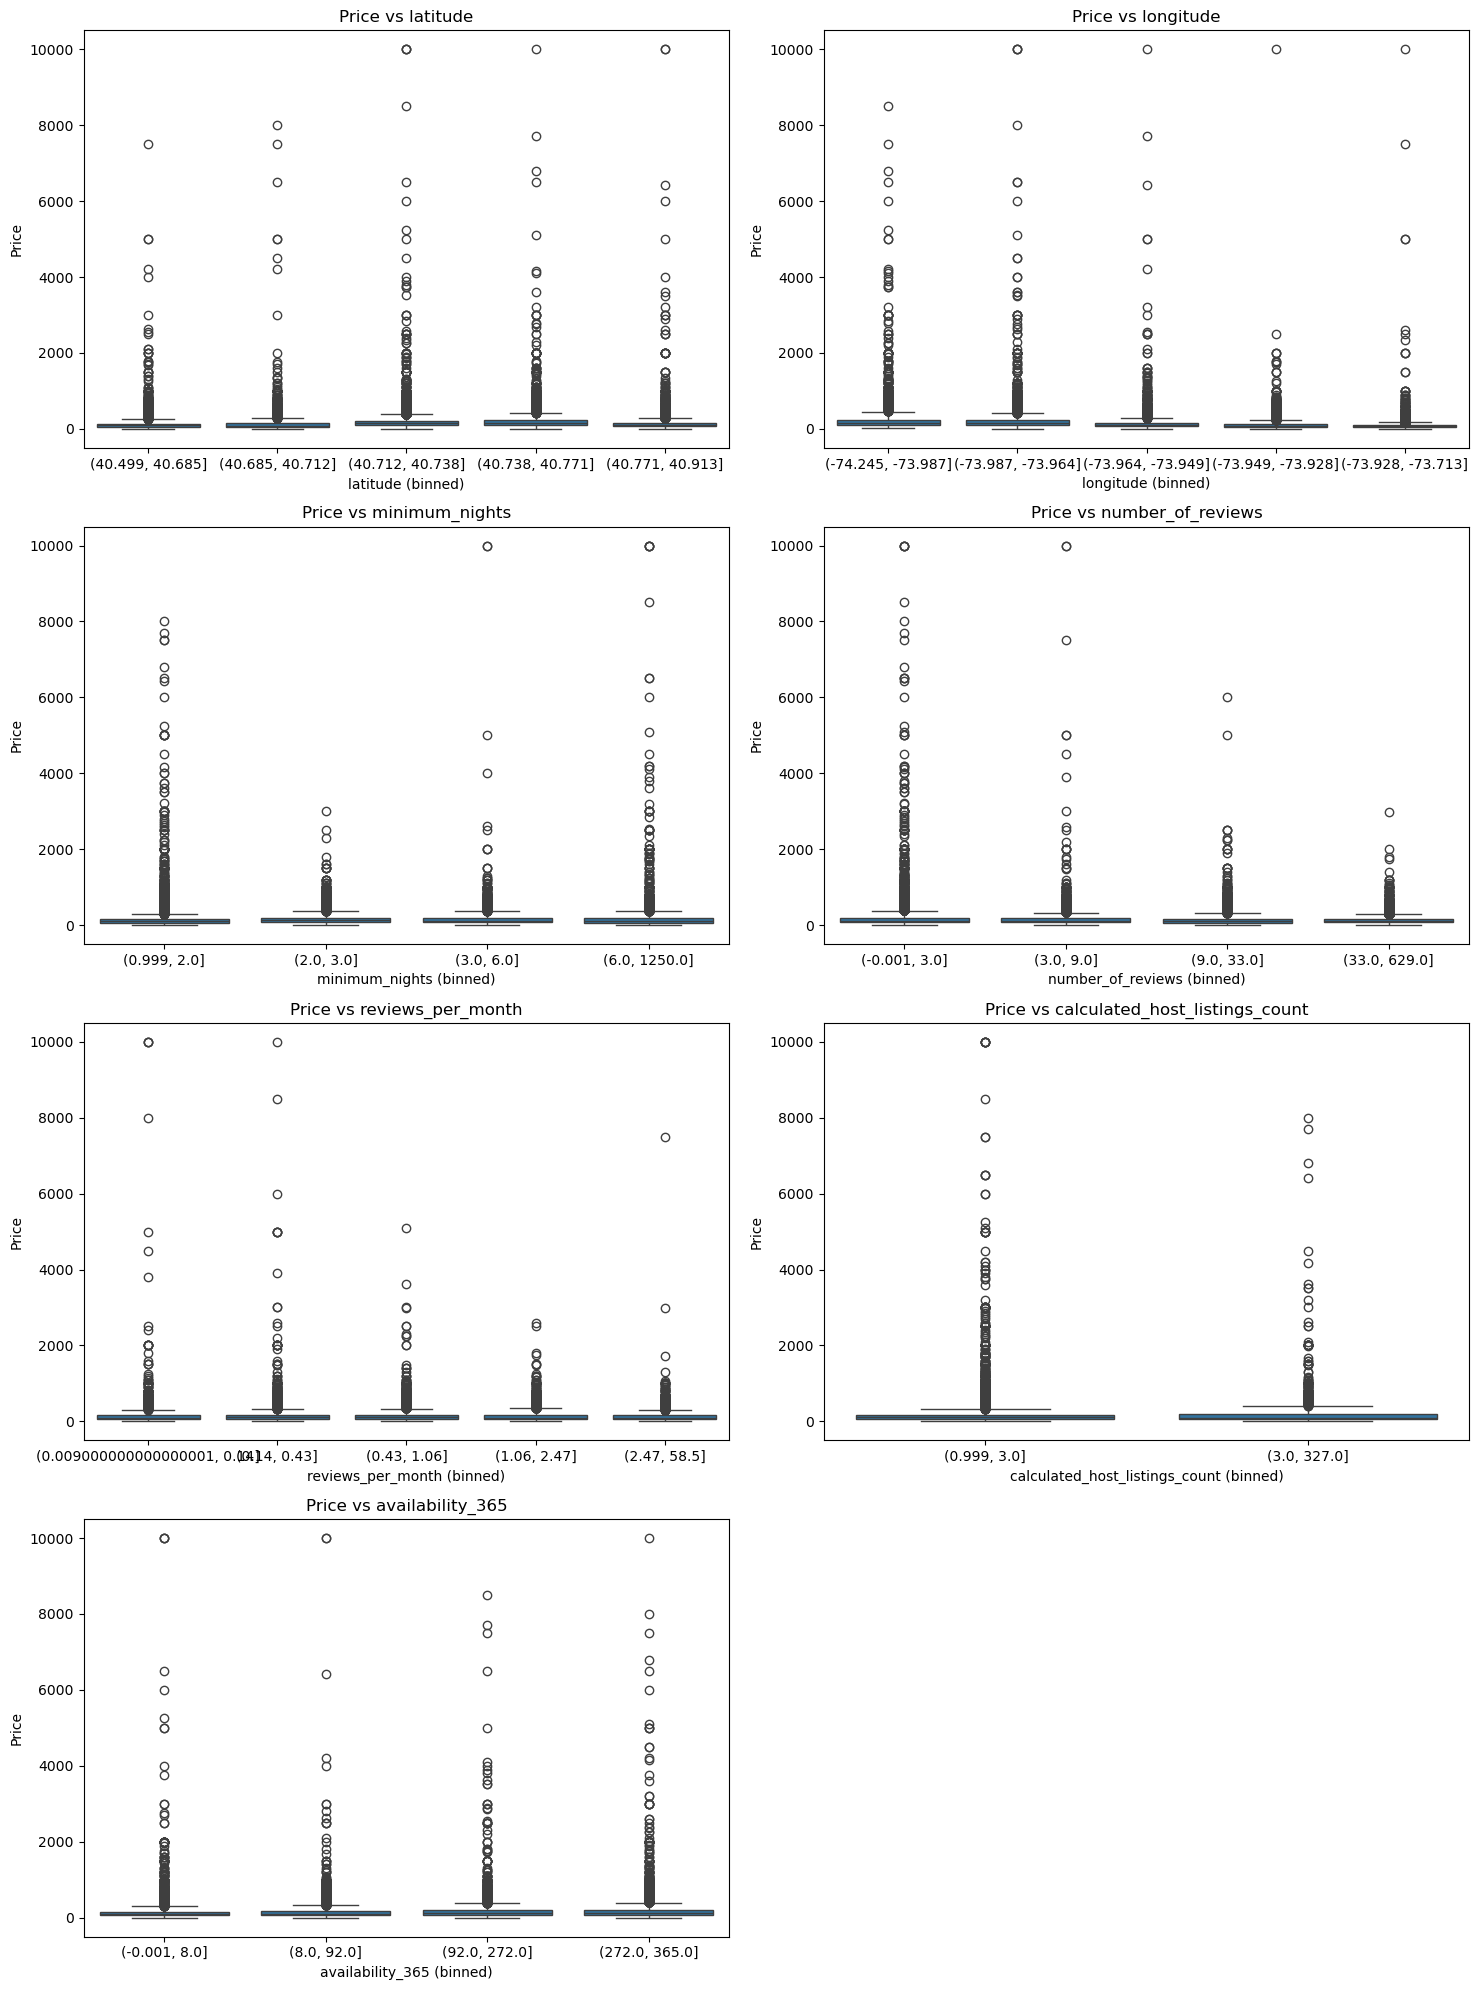

In [45]:

# List all features you want to compare with price
features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
            'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Set up subplots
plt.figure(figsize=(15, 20))

for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)  # Adjust grid (4 rows, 2 columns)
    
    # If the feature is continuous, make bins for clearer boxplot
    if df[feature].nunique() > 10:
        df[f'{feature}_binned'] = pd.qcut(df[feature], q=5, duplicates='drop')
        sns.boxplot(x=f'{feature}_binned', y='price', data=df)
        plt.xlabel(f'{feature} (binned)')
    else:
        sns.boxplot(x=feature, y='price', data=df)
    
    plt.ylabel('Price')
    plt.title(f'Price vs {feature}')

plt.tight_layout()
plt.show()


In [46]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48895 entries, 2 to 48852
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.5+ MB


# Lets predict values with PIPELINE

In [47]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
# Seperate Catgorical and Numerical Columns
categorical_columns = df_complete.select_dtypes(include=['object' , 'category']).columns
numeric_columns = df_complete.select_dtypes(include=['int64' ,'float64'])




In [54]:
# oe = OneHotEncoder(handle_unknown = 'ignore')
from sklearn.preprocessing import LabelEncoder

for col in categorical_columns:

    le = LabelEncoder()
    df_complete[col] = le.fit_transform(df_complete[col])



In [55]:
X1 = df_complete.drop(['price'] , axis = 1)
y1 = df_complete['price']

In [56]:

X_train , X_test , y_train , y_test = train_test_split(X1 , y1 , test_size = 0.2 , random_state = 42) 

In [57]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train , y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
y_predict = rf.predict(X_test)

In [61]:
from sklearn.metrics import r2_score , mean_absolute_error , root_mean_squared_error
print("R2 Score-> ", r2_score(y_predict , y_test))
print("Mean Absolute Error-> ", mean_absolute_error(y_predict , y_test))
print("Root Mwan Square Error-> ", root_mean_squared_error(y_predict , y_test))


R2 Score->  -3.7589940648844324
Mean Absolute Error->  78.40005931076797
Root Mwan Square Error->  236.83298819080943


In [62]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [65]:
y_predict = lr.predict(X_test)

In [66]:
from sklearn.metrics import r2_score , mean_absolute_error , root_mean_squared_error
print("R2 Score-> ", r2_score(y_predict , y_test))
print("Mean Absolute Error-> ", mean_absolute_error(y_predict , y_test))
print("Root Mwan Square Error-> ", root_mean_squared_error(y_predict , y_test))

R2 Score->  -26.43840719139142
Mean Absolute Error->  87.989193711074
Root Mwan Square Error->  247.25566044041423


# Both Models are performming very poor on this dataset

In [ ]:
# Its the end 